# Capstone Project Unit 1- "Examining Dog Adoption Rates"

### Context
The Austin Animal Center is the largest no-kill animal shelter in the United States that provides care and shelter to over 18,000 animals each year and is involved in a range of county, city, and state-wide initiatives for the protection and care of abandoned, at-risk, and surrendered animals.

### Content
The dataset contains daily updated shelter outcomes of several types of animals and breeds from 10/1/2013 to the present 

The Austin Animal Center's original dataset found on their website includes columns for name, date of birth, outcome, animal type, sex and age at time of outcome, breed, and color. Outcomes range widely and include things like adoptions and transfers to other shelters.

__Personal Interest in the Data Set:__
I'm interested to see what kinds of factors affect adoption outcomes of the animals in an animal shelter

In [203]:
# import all the modules I need
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
%matplotlib inline
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

# import in the data table I downloaded from Kaggle
df = pd.DataFrame()
df = pd.read_csv("aac_shelter_outcomes.csv")
pd.options.display.max_rows = 999
pd.options.display.max_columns = 37

# drop the columns I don't want
df = df.drop(['animal_id', 'monthyear', 'outcome_subtype'], axis=1)
df.dropna()

# check out how many of each outcome type are in this data set for all animals
df['outcome_type'].value_counts()

Adoption           33112
Transfer           23499
Return to Owner    14354
Euthanasia          6080
Died                 680
Disposal             307
Rto-Adopt            150
Missing               46
Relocate              16
Name: outcome_type, dtype: int64

In [204]:
# narrow down data set to just dogs
pets = ['Dog']
df.replace('None', np.nan)
df = df[df['animal_type'].isin(pets)].dropna()

# convert ages to numbers (in years) instead of strings


def ages(x):
    number, label = x.split()
    if 'week' in label:
        return float(number)/52
    elif 'month' in label:
        return float(number)/12
    elif 'day' in label:
        return float(number)/365
    else:
        return float(number)


df['age_number'] = df['age_upon_outcome'].apply(ages)

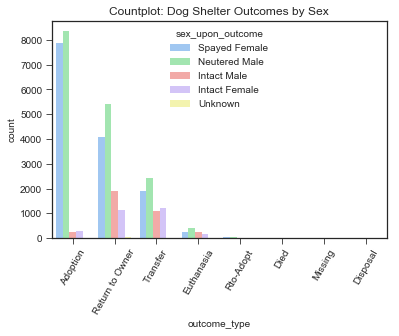

In [205]:
sns.set_style("ticks")
g = sns.countplot(x="outcome_type", hue='sex_upon_outcome', dodge=True,
                  data=df, order=df['outcome_type'].value_counts().index, palette="pastel")
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.title('Countplot: Dog Shelter Outcomes by Sex')
plt.show()

It looks like the most popular outcome is adoption! There's a qualitative trend that the largets amount of dogs in any catergry has the neutered male sex. 
It's hard to see what's happening to the dogs that are not adopted, returned, transferred, or euthanized. Let's zoom in and look at the rest of the outcomes.

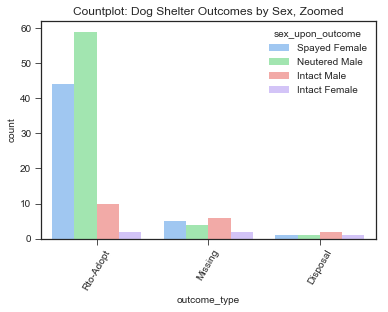

In [206]:
# narrow down data set to just dogs
less_pop_outcomes = ['Rto-Adopt', 'Dead', 'Missing', 'Disposal']

df_zoom = df[df['outcome_type'].isin(less_pop_outcomes)]
sns.set_style("ticks")
g = sns.countplot(x="outcome_type", hue='sex_upon_outcome', dodge=True,
                  data=df_zoom, order=df_zoom['outcome_type'].value_counts().index, palette="pastel")
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.title('Countplot: Dog Shelter Outcomes by Sex, Zoomed')
plt.show()

Even when we zoom in and look at the less popular outcomes, we see that adopting is the most popular, and again for the rto-adopt dogs, the neutered males had the most amount of adoptions. (I think the rto-adopt acronym means returned to owner, then adopted)

In [207]:
# replace the outcome types with numbers so I can take the averages of them
# any type of adoption is  stored as a 1 and anything else is a 0
# 1's are successes (adoptions) and 0's are failures (everything but an adoption)
df['outcome'] = df['outcome_type'].apply(lambda x: float(x.replace('Adoption', '1').replace('Transfer', '0').replace(
    'Return to Owner', '0').replace('Euthanasia', '0').replace('Died', '0').replace('Missing', '0').replace('Rto-Adopt', '1').replace('Disposal', '0').replace('Relocate', '0')))
df

,age_upon_outcome,animal_type,breed,color,date_of_birth,datetime,name,outcome_type,sex_upon_outcome,age_number,outcome
1,1 year,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Transfer,Spayed Female,1.000000,0.0
2,1 year,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,Adoption,Neutered Male,1.000000,1.0
3,9 years,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Transfer,Neutered Male,9.000000,0.0
5,4 months,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,*Edgar,Transfer,Intact Male,0.333333,0.0
7,3 years,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23T00:00:00,2014-12-08T15:55:00,*Ella,Transfer,Spayed Female,3.000000,0.0
11,2 years,Dog,Papillon/Border Collie,Black/White,2012-02-28T00:00:00,2014-03-28T14:39:00,Fancy,Transfer,Neutered Male,2.000000,0.0
12,2 months,Dog,Chihuahua Shorthair/Pomeranian,Black,2014-03-07T00:00:00,2014-05-26T19:10:00,Kash,Adoption,Neutered Male,0.166667,1.0
13,4 years,Dog,Miniature Schnauzer/Miniature Poodle,White,2009-04-27T00:00:00,2014-04-25T11:17:00,Sandy,Return to Owner,Spayed Female,4.000000,0.0
14,8 years,Dog,Labrador Retriever Mix,Black,2006-10-18T00:00:00,2014-10-26T18:20:00,Shy,Return to Owner,Neutered Male,8.000000,0.0
15,2 years,Dog,Rat Terrier Mix,White/Black,2012-06-02T00:00:00,2014-06-15T15:11:00,*Truman,Transfer,Neutered Male,2.000000,0.0


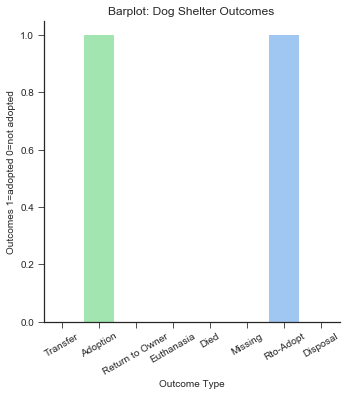

In [208]:
# visualize the dog outcomes to make sure the binary-making code worked
sns.set_style("ticks")
f = sns.factorplot(x="outcome_type", y="outcome", data=df, legend=True,
                   size=5, kind="bar", palette="pastel", ci=95)
f.despine(left=False)
f.set_ylabels("Outcomes 1=adopted 0=not adopted")
f.set_xlabels("Outcome Type")
f.set_xticklabels(rotation=30)
plt.title('Barplot: Dog Shelter Outcomes')
plt.show()

In [209]:
# replace the sex types with numbers so I can take the averages of them
# any type of sex is  stored as a 1 and anything else is a 0
# 1's are successes (neutered/spayed) and 0's are failures (intact)
df['Spayed_Neutered'] = df['sex_upon_outcome'].apply(lambda x: float(x.replace('Spayed Female', '1').replace('Intact Female', '0').replace('Unknown', '0').replace(
    'Intact Male', '0').replace('Neutered Male', '1')))

# replace the sex types with numbers so I can take the averages of them
# Female sex isstored as a 1 and male sex is a 0
df['Gender'] = df['sex_upon_outcome'].apply(lambda x: float(x.replace('Spayed Female', '1').replace('Intact Female', '1').replace('Unknown', '0').replace(
    'Intact Male', '0').replace('Neutered Male', '0')))

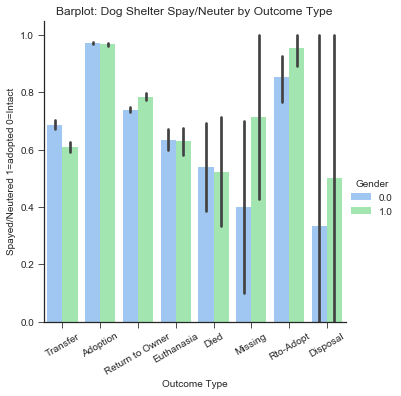

In [210]:
# visualize the dog sexes to make sure the binary-making code worked
sns.set_style("ticks")
f = sns.factorplot(x="outcome_type", y="Spayed_Neutered", hue='Gender', data=df, legend=True,
                   size=5, kind="bar", palette="pastel", ci=95)
f.despine(left=False)
f.set_ylabels("Spayed/Neutered 1=adopted 0=Intact")
f.set_xlabels("Outcome Type")
f.set_xticklabels(rotation=30)
plt.title('Barplot: Dog Shelter Spay/Neuter by Outcome Type')
plt.show()

The higher the bar, the closer it is to the measure of "success", which is that the dog was spayed/neutered. For each bar, we see the percentage of dogs that were spayed/neutered per outcome type. Both types of adoptions had the highest spayed/neutered prevalence. This makes me think that there must be a positive affect of spaying/neutering on adoption rates. The blue color indicates male dogs and the green color indicates female dogs. We see the results for each outcome type are qualitativly around the same amounts and are comprable. It would have been puzzling if one gender was more spayed/neutered than the other and got adopted.

In [211]:
print(df.describe())
print('\n Let us split it up by gender: \n')
print(df.groupby('Gender').describe())

         age_number       outcome  Spayed_Neutered        Gender
count  37181.000000  37181.000000     37181.000000  37181.000000
mean       2.974598      0.453404         0.830424      0.455824
std        3.093083      0.497831         0.375265      0.498051
min        0.000000      0.000000         0.000000      0.000000
25%        1.000000      0.000000         1.000000      0.000000
50%        2.000000      0.000000         1.000000      0.000000
75%        4.000000      1.000000         1.000000      1.000000
max       20.000000      1.000000         1.000000      1.000000

 Let us split it up by gender: 

       Spayed_Neutered                                               \
                 count      mean       std  min  25%  50%  75%  max   
Gender                                                                
0.0            20233.0  0.825434  0.379605  0.0  1.0  1.0  1.0  1.0   
1.0            16948.0  0.836382  0.369940  0.0  1.0  1.0  1.0  1.0   

       age_number        

For 37,181 dogs, we see that the mean age of dogs was about 2.97 years old, there is an average 45.3% prevalence of an adoption outcome, and that there was an 83.0% prevalence of being spayed/neutered.  There are 20,233 male dogs (marked as 0.0 Gender) and 16,948 female dogs (1.0 Gender). The means are close together with small, overlapping std intervals, so I do not think there are statistically significant differences between genders.

__Let's see if there's a difference between breeds, and if that affects the outcomes and adoption prevalence.__

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


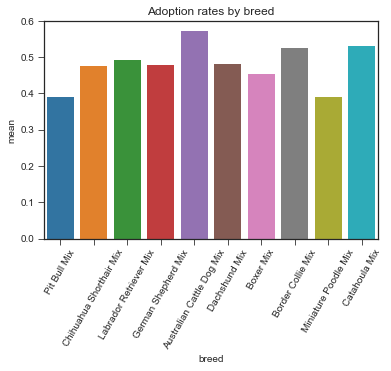

In [212]:
ax = df.groupby('breed')['outcome'].agg({'mean': 'mean', 'count': 'count'}).reset_index(
).sort_values(by='count', ascending=False).head(10)
plot = sns.barplot(x='breed', y='mean', data=ax)
plot.set_title('Adoption rates by breed')
for item in plot.get_xticklabels():
    item.set_rotation(60)

In [213]:
# visualize the top 10 most prevalent dog breeds in order of mean adoption rate
ax.groupby('breed').mean()

,mean,count
breed,,
Australian Cattle Dog Mix,0.571106,886
Border Collie Mix,0.524680,547
Boxer Mix,0.453925,586
Catahoula Mix,0.530120,415
Chihuahua Shorthair Mix,0.475206,3771
Dachshund Mix,0.480992,605
German Shepherd Mix,0.478207,1606
Labrador Retriever Mix,0.491644,3710
Miniature Poodle Mix,0.390196,510


Wow, the top 10 breeds that are in the shelter are all mixes!
We see from the 'mean' column that the known family, friendly dogs (Australian Cattle Dog Mix, Border Collie Mix, etc.) are more than 57% prevalence of being adopted. This is in contrast to more generally aggressive dogs (Pit Bull Mix or Miniature Poodle Mix) which are only adopted 39% of the time.

__Let's find out if age makes a difference__

In [214]:
bx = df.groupby('age_number')['outcome'].agg(
    {'mean': 'mean', 'count': 'count'}).reset_index().sort_values(by='age_number', ascending=False)
bx = bx[bx['count'] > 20]
bx

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,age_number,mean,count
37,17.000000,0.032258,31
36,16.000000,0.075758,66
35,15.000000,0.126050,119
34,14.000000,0.044304,158
33,13.000000,0.154762,252
32,12.000000,0.242967,391
31,11.000000,0.228395,324
30,10.000000,0.252324,753
29,9.000000,0.294498,618
28,8.000000,0.322284,1086


In [215]:
# visualize the age effects in order of mean adoption rate
bx.groupby('age_number').mean()

,mean,count
age_number,,
0.083333,0.709845,579
0.166667,0.772326,1814
0.250000,0.612800,625
0.333333,0.592375,682
0.416667,0.607595,790
0.500000,0.577864,777
0.583333,0.566540,526
0.666667,0.601983,706
0.750000,0.493023,430


It looks like dogs under 1 years old are most likely dogs to be adopted. The most likely is 1 month, and it seems like there's a steady decline in adoption rates as the ages go up. Let's plot that in a scatter plot to see if there's really a correlation.

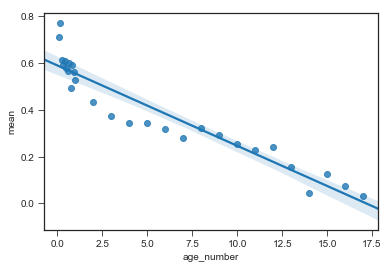

In [216]:
sns.regplot(x="age_number", y="mean", data=bx)

In [217]:
# Check for Pearson Correlation
rho_age, p_age = pearsonr(bx['age_number'], bx['mean'])
print('The Pearson Correlation results are:')
print(rho_age, p_age)

The Pearson Correlation results are:
-0.9468847045125678 2.5205017005513373e-14


The graph above shows qualitatively that there is a seemingly strong negative correlation between age and adoption rate in the dogs of this animal shelter. This means that as age increases, the adoption rate decreases. The strength of this correlation was confirmed by the Pearson Correlation test. Rho is -0.95 and the p-value is 2.5e-14. That is a number much smaller than 0.05, and thus we can conclude that there is a statistically significant correlation between the two.

From exploring the data so far, we've determined that the adoption outcomes are the most popular ones, regardless of neutered/spayed sex, gender, breed, and age. However, the highest adoption rate is still less than 60%. 

The factors that play into adoption rates are:
- age
- breed
- whether it's spayed/neutered or not

I want to know if the adoption rates would increase if the dogs were trained to be more well behaved or not. So many people testify to claiming the dogs that were the 'quietest' or 'most calm.' If we could give dogs lessons on ettiquete, would that increase adoption rates for all breeds?

# Experimental hypothesis
I hypothesize that 8 sessions of dog training school for the dogs in the animal shelter will increase adoption rates.

# A rollout plan showing how you would implement and rollout the experiment
__Set up work__ I would assess different training schools to see their past effectiveness/graduation rates and choose a program that will provide a good, stable infrastructure for my experiment. Additionally, I will number all of the current dogs in the shelter and create a random generator to choose my sample randomly for me. This will ideally make a population that is sufficiently unbiased and a good average representation of the ages, breeds, and sexes of the current dog residents. 

I would then ask the shelter when their low adoption season(s) are, if any, and design my experiment to be run during that time so that no confounding events such as Christmas or something else will affect the normal outcome behavior of the shelter.

A gradual rollout will be used to ensure that there are no negative consequences of the experiment so it can be rolled back quickly. In this case we'll do 8 sessions on 10% of the the randomly chosen dog population sample from the animal shelter reciving training and then 8 sessions at 50%. 

# An evaluation plan showing what constitutes success in this experiment

__Success metric__ will be if the adoption rate (key metric of interest) increases by a significant amount such that the p-value of a t-test is >0.05.

__Secondary metric__ To ensure no adverse effect on other things that matter, we will look at the age of the animals as a secondary metric. I assume that since dog training will take time, the animals may age and it might be harder for them to learn or do the maneuvers or will die (from age or other) before completion. 


After the initial 8 sessions for the first 10% of the dog population, I would assess the adoption rates of the dogs to see if it's a good time to roll out the experiment to 50% of the sample population.

If there's no horrible, significant decrease in adoption rates or rises in death rates for the dogs, then we will continue to 50%.

8 more sessions go by and we have enough dogs in your sample so you now turn the experiment off. No more dogs will be given the training classes. 

Then it's time to analyze what happened and see how the new training program is performing. If the adoption rates for all breeds and sexes and ages increase at a level significantly over a t-test result of a p-value >0.05, then I will conclude that the training program is beneficial for increasing dog adoption rates and will recommend implementing 8 sessions of dog training school for every dog in the shelter.